[<img src="https://bytebucket.org/davis68/resources/raw/f7c98d2b95e961fae257707e22a58fa1a2c36bec/logos/baseline_cse_wdmk.png?token=be4cc41d4b2afe594f5b1570a3c5aad96a65f0d6" width="100%"/>](http://cse.illinois.edu/)

# Simulink:  A Short Course for Engineers

## The Laplace Transform and the Gain Function

##### April 22, 2015 • Computational Science and Engineering

## Contents
- [Exercise 1.1:  Beam with Area Loading](#ex-1)
    - [Module *Part*](#ex-1-parts)
- [Credits](#credits)


---
<a id='ex-1'></a>
<img src="./img/ex1-problem.png" align="right" width="25%" />

## Example 1:  Chemical Concentration Response

Consider a continuously stirred tank reactor (CSTR) with an initial concentration of chemical $c_{1} = c_{1}^{\text{ss}}$.  The flow rate through the system is $\dot{w} = 0.02 \,\text{m}^{3}\cdot\text{s}^{-1}$ and the volume is $V_{1} = 4 \,\text{m}^{3}$.

We wish to measure the response in outlet concentration $c_{1}$ over time due to a variation in inlet concentration
$$
c_{\text{in}}
=
5 \left( \theta(t) - \theta(t-10) \right)
=
\left\{
\begin{align}
0 \;\;\;& t < 0 \\
5 \;\;\;& 0 \leq t \leq 10 \\
0 \;\;\;& t > 10 \\
\end{align}
\right.
\text{.}
$$

##### System Equations

This system is described by the standard CSTR equation for outlet concentration $c_1$,
$$V_{1} \frac{\text{d} c_{1}}{\text{d} t} = \dot{w} \left( c_{\text{in}} - c_{1} \right)$$

which can be transformed by $\tau_{1} \equiv V_{1} / \dot{w} = 200 \,\text{s}$ into
$$\tau_1 \frac{\text{d} c_{1}}{\text{d} t} = c_{\text{in}} - c_{1} \text{.}$$

We will reformulate once more to consider only the _deviation variables_ $c'_{1} \equiv c_{1} - c_{1}^{\text{ss}}$ and $c'_{\text{in}} \equiv c_{\text{in}} - c_{1}^{\text{ss}}$:
$$\tau_1 \frac{\text{d} c'_{1}}{\text{d} t} = c'_{\text{in}} - c'_{1}$$
with the resulting initial condition $c'_{1}(t=0) = c_{1}^{\text{ss}} = 0$.

##### Conversion to Frequency Domain

We can solve the foregoing equation directly by integration, but most system equations are too complex to be amenable to analytical solution.  Thus we will illustrate a solution involving transforming the domain of the problem from time $t$ into frequency $s$, allowing an algebraic solution of the equation prior to conversion back into the time domain.

Generally, the Laplace transform $ℒ$ is defined
$$ℒ\left[f(t), t, s\right] \equiv \int_0^\infty {\text{d}\bar{t}\, e^{-s\bar{t}} f(\bar{t}) } = F(s) \text{.}$$

This converts the system from a time-domain expression via $\exp$ (as a composite of $\cos$ and $\sin$) into a frequency-domain problem.  The problem is solved algebraically, and then converted via the inverse Laplace transform $ℒ^{-1}$ back into a time-domain expression.  (This latter step is most often accomplished via a table of common expressions due to the complexity of the resulting integration in the complex plane.)

Thus, for this particular system in the deviation variable $c'_{1}$, the frequency-domain problem is expressed
$$
\begin{align}
ℒ\left[\tau_1 \frac{\text{d} c'_{1}}{\text{d} t} = c'_{\text{in}} - c'_{1}, t, s\right]
\rightarrow &
ℒ\left[ \tau_1 \frac{\text{d} c'_{1}}{\text{d} t} \right] =
ℒ\left[ c'_{\text{in}} \right] - ℒ\left[ c'_{1} \right] & \textrm{separate terms}
\\
\rightarrow &
\tau_1 ℒ\left[ \frac{\text{d} c'_{1}}{\text{d} t} \right] =
C'_{\text{in}}(s) - C'_{1}(s) & \textrm{by definition } C'(s) \equiv ℒ\left[ c'(t), t, s \right]
\\
\rightarrow &
\tau_1 \int_0^\infty {\text{d}\bar{t}\, e^{-s\bar{t}} \frac{\text{d} c'_{1}}{\text{d} t} } =
C'_{\text{in}}(s) - C'_{1}(s) & \textrm{state in integral form}
\\
\rightarrow &
\tau_1 \left[ e^{-s\bar{t}} c'_{1}(\bar{t}) \bigg|_{\bar{t}=0}^{\infty} + \int_0^\infty {\text{d}\bar{t}\, s \, e^{-s\bar{t}} c'_{1}(\bar{t}) } \right] =
\tau_1 s ℒ\left[ c'_{1} \right] = 
C'_{\text{in}}(s) - C'_{1}(s) & \textrm{integrate by parts}
\\
\rightarrow &
\tau_{1} s C'_{1}(s) =
C'_{\text{in}}(s) - C'_{1}(s) & \textrm{solve algebraically}
\\
\rightarrow &
\frac{C'_1(s)}{C'_\text{in}(s)} = \frac{1}{\tau_1 s + 1}
\text{.}
\end{align}
$$

We now require the transformation of the inlet flow condition into the frequency domain.
$$
\begin{align}
ℒ\left[ c'_{\text{in}} = 5 \left( \theta(t) - \theta(t-10) \right), t, s\right]
\rightarrow &
ℒ\left[ c'_{\text{in}} \right] =
5 ℒ\left[ \theta(t) \right] - 5 ℒ\left[ \theta(t-10) \right] & \textrm{separate terms}
\\
\rightarrow &
C'_{\text{in}}(s) =
5 \int_0^\infty {\text{d}\bar{t}\, e^{-s\bar{t}} \theta(\bar{t})} -
5 \int_0^\infty {\text{d}\bar{t}\, e^{-s\bar{t}} \theta(\bar{t}-10)}
\\
\rightarrow &
C'_{\text{in}}(s) =
\frac{5}{s} - \frac{5}{s} e^{-10s}
= \frac{5}{s}\left( 1-e^{-10s} \right)
& \text{see note for details}
\text{.}
\end{align}
$$

(For the Laplace transform of the Heaviside step function, see [this reference](http://tutorial.math.lamar.edu/classes/de/StepFunctions.aspx).)

Together, these statements yield
$$
\begin{align}
\frac{C'_1(s)}{\frac{5}{s}\left( 1-e^{-10s} \right)} =& \frac{1}{\tau_1 s + 1} \\
\rightarrow &
C'_1(s) = \frac{1}{\tau_1 s + 1} \frac{5}{s}\left( 1-e^{-10s} \right)
\text{.}
\end{align}
$$

This final statement can be trivially converted back into the time domain by means of a table; in this case, the resulting expression is
$$
\begin{align}
c'_1(t) = ℒ^{-1}\left[ C'_{\text{in}}(s), s, t \right]
= &
5 \left(
1 - e^{-t/\tau_1}
\right)
-
5 \left(
1 - e^{-(t-10)/\tau_1}
\right)
\theta(t-10)
\text{.}
\end{align}
$$


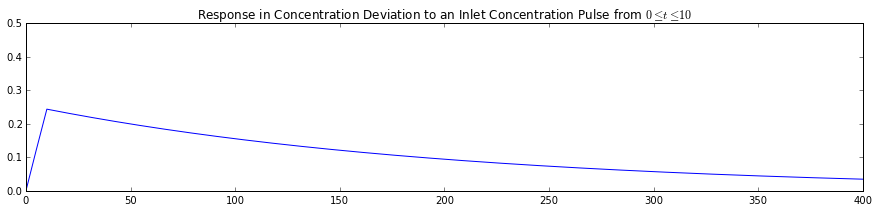

In [28]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize']=(15,3)

tau1 = 200 #s

t = np.linspace(0, 400, 1001)
cprime = np.where(t<10, 5*(1-np.exp(-t/tau1)), 5*(1-np.exp(-t/tau1))-5*(1-np.exp(-(t-10)/tau1)))

plt.plot(t,cprime)
plt.title('Response in Concentration Deviation to an Inlet Concentration Pulse from $0\leq t\leq10$')
plt.ylim((0,0.5))
plt.show()

---
<a id='credits'></a>

## Credits

Neal Davis and Erika Fotsch developed these materials for [Computational Science and Engineering](http://cse.illinois.edu/) at the University of Illinois at Urbana–Champaign.

<img src="http://i.creativecommons.org/l/by-nc/4.0/88x31.png" align="left">
This content is available under a [Creative Commons Attribution-NonCommercial 4.0 Unported License](https://creativecommons.org/licenses/by-nc/4.0/).

[![](https://bytebucket.org/davis68/resources/raw/f7c98d2b95e961fae257707e22a58fa1a2c36bec/logos/baseline_cse_wdmk.png?token=be4cc41d4b2afe594f5b1570a3c5aad96a65f0d6)](http://cse.illinois.edu/)